### <C>SIMPLE CROSSVALIDATION</C>







In [163]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
import matplotlib.pyplot as plt

In [15]:
# DGP
sigma = 2
n = 100   # number of records
np.random.seed(100)
rsquared = np.zeros(1)
x = np.random.normal(5,sigma,(n,1))
x = sm.add_constant(x)
y = np.random.normal(7,sigma,(n,1))
ols = sm.OLS(y,x).fit()
print(ols.summary())
rsquared[0] = np.round(ols.rsquared,3)
rsquared


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.636
Date:                Sat, 28 Jul 2018   Prob (F-statistic):              0.108
Time:                        20:26:31   Log-Likelihood:                -216.09
No. Observations:                 100   AIC:                             436.2
Df Residuals:                      98   BIC:                             441.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7104      0.565     13.637      0.0

array([0.026])

In [171]:
# DGP  
k = 10  # number of folds
sigma = 1 # standard deviation
row = 10000  # number of records
np.random.seed(100)
x  =  np.random.normal(5,sigma,(row,1)) # generating x values
w = np.random.normal(2,sigma,(row,1))
e = np.random.normal(0,sigma,(row,1)) # generaring e values
y = x + w + e # generating y values
#x = sm.add_constant(x) # adding constant to x values
df = pd.DataFrame(np.hstack((y,x,w))) # creating a dataframe of values
df.columns = ["y","x1","x2"]
ols1 = smf.ols('y~x1+x2',data = df).fit()
# model.summary()
print("Rsquared witout CV= "+ str(ols1.rsquared))

# Creating K-Folds 

final_list = []
lists = []
n = np.arange(row)
random.shuffle(n)
length = len(n) // k
j = 0
for i in range(k):
    if i == k-1 :
        length += len(n) - (k*(len(n)//k))
    for index in range(j,j+length) : 
        lists.append(n[index])
    final_list.append(lists)
    lists = []
    j=j+length
    if i == k-1 :
        length += n - (k*(n//k))

# Cross Validation and saving rsquared in container

cv_container = np.zeros((k,1))

for index,key in enumerate(final_list):
    test = []
    train = []
    test = key
    for index2,key2 in enumerate(final_list):
        if index2 != index:
            train = train + key2
    train_df =  df.iloc[train,:]
    test_df = df.iloc[test,:]
    ols = smf.ols('y~x1+x2',data = train_df).fit()
    pred = ols.predict(test_df)
    cv_container[index] = ols.rsquared
print("the mean value of R squared = " + str(cv_container.mean()))
        
        

Rsquared witout CV= 0.6707688497155784
the mean value of R squared = 0.6707714566902443


## BOOTSTRAPPING

Upper and lower confidence interval of prediction is :0.2173160258387173 0.27508747369284586
Mean coefficient value of B1 = 0.992454229213885
Mean coefficient value of B2 = 5.00128695979683


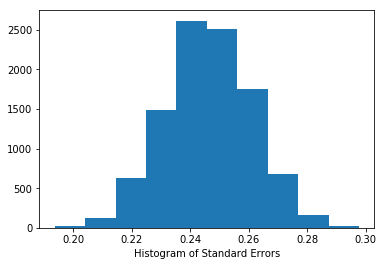

In [225]:
#  DGP process
train_percent = .6  # train set size
sigma = 1
rows = 1000     # number of rows
train_len = int(.6*rows)  # train set size
x1 = np.random.normal(10,2,(rows,1))
x2 = np.random.normal(2,4,(rows,1))
e = np.random.normal(0,0.5,(rows,1))
y = x1 + (5*x2) + e # equation of the dependent variable
df=[]
df = np.hstack((y,x1,x2))
df = pd.DataFrame(df)
df.columns = ["y","x1","x2"]

# End of DGP

# Bootstrapping

iter = 10000 # number of bootstrapping iterations
n = np.arange(rows)
container = np.zeros((iter,3))
for i in range((iter)):
    random.shuffle(n) # shuffling the rows 
    train_seq= n[:train_len]
    test_seq = n[train_len:]
    train =df.iloc[train_seq,:]  # creating test and train with replacement
    test =  df.iloc[test_seq,:]
    ols = smf.ols('y~x1+x2',data=train).fit()
    #container[i] = ols.rsquared  # if looking to store rsquared values
    pred = ols.predict(test)
    ss = (pred - test["y"])**2
    sse = ss.mean()
    container[i,0] = sse
    container[i,1] = ols.params[1]
    container[i,2] = ols.params[2]
    
#print(container)

# conf interval 
# non parametric - no assumptions about underlying distribution
alpha = 5
order_container = np.sort(container[:,0])
UCL = np.percentile(order_container,100-(alpha/2))
LCL = np.percentile(order_container,(alpha/2))
print("Upper and lower confidence interval of prediction is :" + str(LCL),str(UCL)) # prints the confidence limits of standard error
plt.hist(order_container)
plt.xlabel("Histogram of Standard Errors")
print("Mean coefficient value of B1 = "+str(container[:,1].mean()))
print("Mean coefficient value of B2 = "+str(container[:,2].mean()))
